<a href="https://colab.research.google.com/github/Ryanfs-ng/MachineLearning/blob/main/Rede_neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.ToTensor() #definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) #Carrega a parte de treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 607kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.23MB/s]


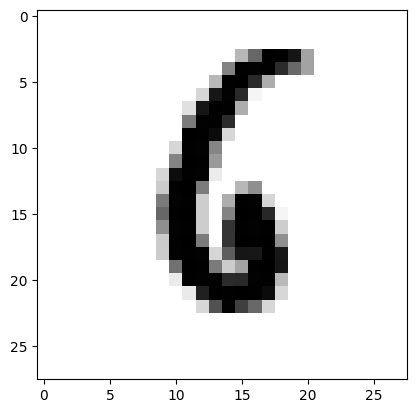

In [12]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [13]:
print(imagens[0].shape) #para verificar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) #para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [14]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) #camada de entrada, 784 neurônios que se ligam a 128
    self.linear2 = nn.Linear(128, 64) #camada interna 1, 128 neurônios que se ligam a 64
    self.linear3 = nn.Linear(64, 10) #camada interna 2, 64 neurônios que se ligam a 10
    # para a camada de saída não é necessário definir nada pois só precisamos pegar o output da camada interna 2

    def forward(self,x):
      x = F.relu(self.linear1(x)) # função de ativação da camada de entrada para a camada interna 1
      x = F.relu(self.linear2(x)) # função de ativação da camada interna 1 para a camada interna 2
      x = self.linear3(x) # função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x
      return F.log_softmax(X, dim=1) # dados utilizados para calcular a perda